In [9]:
import jieba
#获取淘宝搜索信息,提取商品和价格,淘宝的搜索接口,翻页的处理

#提交请求,获取页面
#提取商品名称和价格


import requests as rq
import re

def getHTML(url):
    r=rq.get(url,timeout=30)
    r.encoding=r.apparent_encoding
    return r.text
    
def parsePage(ilt,html):
    try:
        plt=re.findall(r'\"view_price\"\:\"[\d\.]*\"',html)
        tlt=re.findall(r'\"raw_title\"\:\".*?\"',html)
        for i in range(len(plt)):
            price=eval(plt[i].split(':')[1])
            title=eval(tlt[i].split(':')[1])
            ilt.append([price,title])
    except:
        print('')
    
def printGoodsList(ilt):
    tplt='{:4}\t{:8}\t{:16}'
    print(tplt.format('序号','价格','商品名称'))
    count=0
    for g in ilt:
        count=count+1
        print(tplt.format(count,g[0],g[1]))
    
def main():
    goods='福佳'
    depth=6
    start_url='https://s.taobao.com/search?q='+goods
    infoList=[]
    for i in range(depth):
        #try:
        url=start_url+'&s='+str(44*i)
        html=getHTML(url)
        parsePage(infoList,html)
        #except:
        #continue
    printGoodsList(infoList)
    with open('wordcloud.txt','a',encoding='utf-8') as f:
        f.write(str(infoList)+'\n')
        
    
        
    
        
main()

序号  	价格      	商品名称            
   1	169.00  	福佳 比利时原瓶进口 福佳白 精酿啤酒整箱
   2	169.00  	福佳白啤酒进口精酿啤酒500ml*24罐包邮整箱啤酒批发
   3	44.90   	比利时原装进口 福佳 白啤酒 330ml*6瓶 整箱装
   4	218.00  	新日期！法国原装进口啤酒1664白啤酒果味克伦堡凯旋250ml*24瓶整
   5	118.00  	欣顺昊带盖发酵桶食品级塑料密封桶酿酒设备白酒葡萄酒啤酒米酒桶
   6	79.00   	范智乔 2018短袖百搭t恤纯棉学生白色宽松复古港味啤酒印花T
   7	31.68   	大排档塑料椅白色沙滩椅扶手靠背椅啤酒桌椅会议展销专用椅子餐椅
   8	148.00  	啤酒配炸鸡 短t配艳阳！春日度假款精致玫瑰刺绣字母短袖T恤女春
   9	129.00  	德国白香肠套餐 白肠四件套 早餐烧烤主食啤酒小食 未添加防腐剂
  10	248.00  	seeubaby韩国代购Vetiver 百搭啤酒节来一件印花开口袖休闲卫衣
  11	48.00   	男士塑身衣瘦身收腹塑胸束胸束腰上衣紧身内衣啤酒肚健身运动背心
  12	45.00   	独家自制 ins热门款春夏韩版啤酒瓶短袖印花T恤宽松显瘦套头上衣
  13	2.20    	5斤装食品级PET透明食用塑料啤酒桶扎啤桶白酒壶 2.5L鲜啤酒瓶
  14	25.00   	K-97 德式艾尔啤酒酵母 弗曼迪斯Fermentis原装进口 比利时小麦
  15	298.00  	定制定做充气白酒啤酒瓶气模阿萨姆奶茶瓶模型红酒瓶咖啡杯饮料瓶
  16	133.00  	充气瓶子模型 行走百威/纯生/雪花啤酒瓶人偶服 红/白酒瓶子气模
  17	88.00   	比利时小麦啤酒原料包配方套餐 福佳啤酒原料包 自酿啤酒原料包
  18	39.90   	0.9宜家国内代购  福佳附盖储物盒/ 收纳盒25x36x20 厘米
  19	6.00    	现货经典牛卡小6 6 8 10 12寸蛋糕盒新款手提式带刀叉包装可定制
  20	48.00   	特种离子原创简约卡通啤酒印花T恤国潮余文乐纯棉圆领短袖T恤男款
  21	45.00   	韩版18年女装新款圆领啤酒妹短袖打底上衣T恤潮
  22	

In [ ]:
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt
import jieba
# jieba.load_userdict("txt\userdict.txt")
# 添加用户词库为主词典,原词典变为非主词典
from wordcloud import WordCloud, ImageColorGenerator
# 获取当前文件路径
# __file__ 为当前文件, 在ide中运行此行会报错,可改为
# d = path.dirname('.')
d = path.dirname(__file__)

stopwords = {}
isCN = 1 #默认启用中文分词
back_coloring_path = "img/lz1.jpg" # 设置背景图片路径
text_path = 'txt/lz.txt' #设置要分析的文本路径
font_path = 'D:\Fonts\simkai.ttf' # 为matplotlib设置中文字体路径没
stopwords_path = 'stopwords\stopwords1893.txt' # 停用词词表
imgname1 = "WordCloudDefautColors.png" # 保存的图片名字1(只按照背景图片形状)
imgname2 = "WordCloudColorsByImg.png"# 保存的图片名字2(颜色按照背景图片颜色布局生成)

my_words_list = ['路明非'] # 在结巴的词库中添加新词

back_coloring = imread(path.join(d, back_coloring_path))# 设置背景图片
# 设置词云属性
wc = WordCloud(font_path=font_path,  # 设置字体
               background_color="white",  # 背景颜色
               max_words=2000,  # 词云显示的最大词数
               mask=back_coloring,  # 设置背景图片
               max_font_size=100,  # 字体最大值
               random_state=42,
               width=1000, height=860, margin=2,# 设置图片默认的大小,但是如果使用背景图片的话,那么保存的图片大小将会按照其大小保存,margin为词语边缘距离
               )

# 添加自己的词库分词
def add_word(list):
    for items in list:
        jieba.add_word(items)

add_word(my_words_list)


text = open(path.join(d, text_path)).read()

def jiebaclearText(text):
    mywordlist = []
    seg_list = jieba.cut(text, cut_all=False)
    liststr="/ ".join(seg_list)
    f_stop = open(stopwords_path)
    try:
        f_stop_text = f_stop.read( )
        f_stop_text=unicode(f_stop_text,'utf-8')
    finally:
        f_stop.close( )
    f_stop_seg_list=f_stop_text.split('\n')
    for myword in liststr.split('/'):
        if not(myword.strip() in f_stop_seg_list) and len(myword.strip())>1:
            mywordlist.append(myword)
    return ''.join(mywordlist)

if isCN:
    text = jiebaclearText(text)

# 生成词云, 可以用generate输入全部文本(wordcloud对中文分词支持不好,建议启用中文分词),也可以我们计算好词频后使用generate_from_frequencies函数
wc.generate(text)
# wc.generate_from_frequencies(txt_freq)
# txt_freq例子为[('词a', 100),('词b', 90),('词c', 80)]
# 从背景图片生成颜色值
image_colors = ImageColorGenerator(back_coloring)

plt.figure()
# 以下代码显示图片
plt.imshow(wc)
plt.axis("off")
plt.show()
# 绘制词云

# 保存图片
wc.to_file(path.join(d, imgname1))

image_colors = ImageColorGenerator(back_coloring)

plt.imshow(wc.recolor(color_func=image_colors))
plt.axis("off")
# 绘制背景图片为颜色的图片
plt.figure()
plt.imshow(back_coloring, cmap=plt.cm.gray)
plt.axis("off")
plt.show()
# 保存图片
wc.to_file(path.join(d, imgname2))
    

<class 'str'>


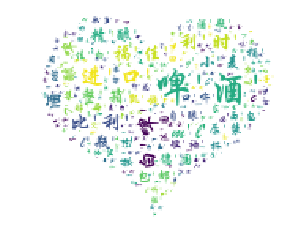

In [14]:
from os import path
import os
from scipy.misc import imread
import matplotlib.pyplot as plt
import jieba
from wordcloud import WordCloud as WC
from wordcloud import ImageColorGenerator as ICG
from PIL import Image
import numpy as np
import re
d=os.getcwd()
stopwords={}
isCN=1#是否是Chinese
#jieba.load_userdict('.txt')#添加自定义词典
back_coloring_path='C:\\Users\\hzg0601\\Pictures\\heart2.png'
font_path='C:\\Windows\\Fonts\\STXINGKA.ttf'
text_path='wordcloud.txt'
imgname1='WCDefaultColor.png'
imgname2='WCColorbyImg.png'
back_coloring=np.array(Image.open(back_coloring_path))
text=open(text_path,encoding='utf-8').read()#读取文本
print(type(text))
re_text=str(re.findall(r'[^\d]',text))
jieba.add_word('福佳')
jieba.add_word('白啤')
jieba.add_word('啤酒')
jieba.suggest_freq('比利时',True)
wordlist=jieba.cut(re_text,cut_all=False,HMM=False)
wl_space_split=''.join(wordlist)#以空格将分割后的词连接
my_wordcloud=WC(background_color='white',\
                mask=back_coloring,\
                max_words=200,\
                font_path=font_path,
                max_font_size=50,
                random_state=30,
                scale=0.5
               ).generate(wl_space_split)
img_colors=ICG(back_coloring)#随机配色,由ICG函数
#my_wordcloud.recolor(color_func=img_colors)#根据背景颜色的配色重新为词云配色
plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()
my_wordcloud.to_file(path.join(d,imgname2))

In [2]:
#coding:utf-8
import matplotlib.pyplot as plt
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS
import jieba
import numpy as np
from PIL import Image

#读入背景图片
abel_mask = np.array(Image.open("filepath"))

#读取要生成词云的文件
text_from_file_with_apath = open('filepath').read()

#通过jieba分词进行分词并通过空格分隔
wordlist_after_jieba = jieba.cut(text_from_file_with_apath, cut_all = True)
wl_space_split = " ".join(wordlist_after_jieba)
#my_wordcloud = WordCloud().generate(wl_space_split) 默认构造函数
my_wordcloud = WordCloud(
            background_color='white',    # 设置背景颜色
            mask = abel_mask,        # 设置背景图片
            max_words = 200,            # 设置最大现实的字数
            stopwords = STOPWORDS,        # 设置停用词
            font_path = 'C:/Users/Windows/fonts/simkai.ttf',# 设置字体格式，如不设置显示不了中文
            max_font_size = 50,            # 设置字体最大值
            random_state = 30,            # 设置有多少种随机生成状态，即有多少种配色方案
                scale=.5
                ).generate(wl_space_split)

# 根据图片生成词云颜色
image_colors = ImageColorGenerator(abel_mask)
my_wordcloud.recolor(color_func=image_colors)

# 以下代码显示图片
plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'filepath'

In [4]:
text=open(text_path,encoding='utf-8').read()#读取文本
print(type(text))

<class 'str'>
